In [1]:
from IPython.core.display import HTML
HTML("\n".join(open('mioti_style.css', 'r').readlines()))

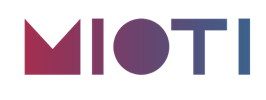
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S4: Predicción de precios AirBNB

## Objetivos

El objetivo de este challenge es predecir el precio de las viviendas de AirBnB Madrid a partir de alguna de sus características.

Este challenge utiliza un dataset real que no está pensado para aplicar técnicas de machine learning así que no esperes que las cosas funcionen bien a la primera 🤓.

## Configuración del entorno

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

## Dataset

Para este worksheet utilizaremos el dataset de airbnb Madrid.

In [3]:
df = pd.read_csv('dataset_airbnb_madrid.csv')

Para simplificar el problema vamos a formular el problema del challenge de una manera más concreta:

Vamos a intentar predecir el precio:

In [4]:
df_y = df[['price']]

A partir de 5 variables que a priori parecen relevantes para determinar el precio de un alojamiento: `['review_scores_rating', 'room_type', 'property_type', 'bedrooms', 'bathrooms']`

Como siempre, si tu quieres considerar otras variables adelante.

In [5]:
df_X = df[['review_scores_rating', 'room_type', 'property_type', 'bedrooms', 'bathrooms' ]]

In [6]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 5 columns):
review_scores_rating    10417 non-null float64
room_type               13335 non-null object
property_type           13335 non-null object
bedrooms                13312 non-null float64
bathrooms               13285 non-null float64
dtypes: float64(3), object(2)
memory usage: 521.0+ KB


In [7]:
df_X

,review_scores_rating,room_type,property_type,bedrooms,bathrooms
0,92.0,Private room,House,1.0,2.0
1,93.0,Entire home/apt,Apartment,3.0,1.0
2,93.0,Entire home/apt,Apartment,1.0,1.0
3,98.0,Private room,Apartment,1.0,1.0
4,100.0,Entire home/apt,Apartment,2.0,1.5
5,98.0,Entire home/apt,Apartment,3.0,2.0
6,98.0,Entire home/apt,Apartment,1.0,1.0
7,95.0,Entire home/apt,Apartment,1.0,1.0
8,NaN,Private room,Apartment,1.0,1.0
9,75.0,Entire home/apt,Apartment,1.0,1.0


## Preprocesamiento de datos

Como siempre, vamos a inspeccionar y estudiar cada variable por separado.

### Price

Es la variable de clase. Divide esta variable en 4 rangos (muy bajo, bajo, medio, alto, muy alto) que pienses que son razonables para estudiar esta variable. Como consejo, quizás puedes utilizar los percentiles para hacer esta división.

Antes de hacer esta división revisa que esta variable esté codificada como un número, si no lo está la tendrás que convertir previamente.

Una vez que tengas la variable transformada, conviértela a un array de numpy para trabajar.

In [9]:
def convert_price (output):
###
#Convierte la columna precio para poder procesar y dividir en 5 niveles basados en percentiles
###

    output['price'] = output['price'].str.replace('$', '')
    output['price'] = df_y['price'].str.replace(',', '')
    output['price']= pd.to_numeric(output['price'])
    #Calculo de percentiles. La anterior es otra de prueba que salió
    x = output.as_matrix()
    percentiles = np.percentile(x, [5, 25, 75, 95])
    percentiles = percentiles.astype(int)
    percentiles = percentiles.astype(float)
    #Nueva columna para categorrizar los niveles de precio
    output['Class']= 0
    #Creacion de los rangos con los percentiles
    filtered_data1 = output[(output.price < 18)]
    filtered_data2 = output[(output.price > 18) & (output.price <=31)]
    filtered_data3 = output[(output.price > 31) & (output['price']<=80)]
    filtered_data4 = output[(output.price > 80) & (output['price']<=160)]
    filtered_data5 = output[(output.price > 160)]
    # Se define las clases en valor numerico de muy bajo a muy alto
    output['Class'][filtered_data1.index] = 1
    output['Class'][filtered_data2.index] = 2
    output['Class'][filtered_data3.index] = 3
    output['Class'][filtered_data4.index] = 4
    output['Class'][filtered_data5.index] = 5
    #Se convierte a una sola columna para introducir en el modelo
    output = output['Class']
    
    return output




In [10]:
df_y = convert_price(df_y)

In [14]:
df_y = np.array(df_y)#Se convierte en array para dejarlo listo para entrenar

### review_scores_rating

Esta variable parece un número. Revisa:

* Si tiene nulos o no. Si los tiene trátalos adecuadamente.
* Revisa el rango de la variable.

In [15]:
df_X['review_scores_rating'].isnull().any()

True

In [16]:
df_X['review_scores_rating'] = df_X['review_scores_rating'].fillna(df_X['review_scores_rating'].mean())

In [17]:
print(df_X['review_scores_rating'].max())
print(df_X['review_scores_rating'].min())


100.0
20.0


In [18]:
df_X['review_scores_rating']

0         92.00000
1         93.00000
2         93.00000
3         98.00000
4        100.00000
5         98.00000
6         98.00000
7         95.00000
8         91.62062
9         75.00000
10       100.00000
11        85.00000
12        82.00000
13        93.00000
14       100.00000
15        91.62062
16        92.00000
17        89.00000
18        91.62062
19        94.00000
20        84.00000
21        91.62062
22        91.00000
23        95.00000
24        99.00000
25        77.00000
26        80.00000
27        91.62062
28        93.00000
29        97.00000
           ...    
13305     90.00000
13306     86.00000
13307     95.00000
13308    100.00000
13309     92.00000
13310     94.00000
13311     92.00000
13312     95.00000
13313    100.00000
13314    100.00000
13315     90.00000
13316     93.00000
13317     96.00000
13318     95.00000
13319     91.62062
13320     89.00000
13321     91.00000
13322     98.00000
13323     86.00000
13324    100.00000
13325     87.00000
13326     87

### room_type

Esta variable parece un valor enumerado. Revisa:

* Si tiene nulos o no. Si los tiene trátalos adecuadamente.
* Si tiene muchos clases distintas piensa en reducirlas.

Una vez que esté bien crea variables ficticias a partir de esta.

In [19]:
df_X['room_type'].isnull().any()

False

In [20]:
df_X['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [21]:
df_X['room_type'] = df_X.room_type.replace('Entire home/apt', 1)
df_X['room_type'] = df_X.room_type.replace('Private room', 2)
df_X['room_type'] = df_X.room_type.replace('Shared room', 3)
#df_X['room_type'] = df.room_type.str.replace('Private room', '2')

### property_type

Esta variable parece un valor enumerado. Revisa:

* Si tiene nulos o no. Si los tiene trátalos adecuadamente.
* Si tiene muchos clases distintas piensa en reducirlas.

Una vez que esté bien crea variables ficticias a partir de esta.

In [22]:
df_X['property_type'].isnull().any()

False

In [23]:
df_X['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Bed & Breakfast', 'Loft',
       'Other', 'Hostel', 'Guesthouse', 'Dorm', 'Serviced apartment',
       'Earth House', 'Casa particular', 'Boutique hotel', 'Townhouse',
       'Chalet', 'Villa', 'Camper/RV', 'Guest suite', 'Timeshare',
       'Bungalow', 'Tent', 'Boat'], dtype=object)

In [24]:
groupby_dict = {'House':'Clase 2', 
                'Apartment':'Clase 2', 
                'Condominium':'Clase 2', 
                'Bed & Breakfast':'Clase 1',
                'Loft':'Clase 2', 
                'Other':'Clase 3', 
                'Hostel':'Clase 1',
                'Guesthouse':'Clase 1', 
                'Dorm':'Clase 2', 
                'Serviced apartment':'Clase 1',
                'Earth House':'Clase 3',
                'Earth 2': 'Clase 3',
                'Casa particular':'Clase 2', 
                'Boutique hotel':'Clase 1', 
                'Townhouse':'Clase 2',
                'Chalet':'Clase 2', 
                'Villa':'Clase 2', 
                'Camper/RV':'Clase 3', 
                'Guest suite':'Clase 2',
                'Timeshare':'Clase 3', 
                'Bungalow':'Clase 3', 
                'Tent':'Clase 3', 
                'Boat':'Clase 3'}

In [25]:
lista1 = []
lista2 = []
lista3 = []
for key,value in groupby_dict.items():
    if value == 'Clase 1':
        lista1.append(key)
    if value == 'Clase 2':
        lista2.append(key)
    if value == 'Clase 3':
        lista3.append(key)

    

In [26]:
for values in lista1:
    df_X['property_type'] = df_X['property_type'].str.replace(str(values), '1')

for values2 in lista2:
    df_X['property_type'] = df_X.property_type.str.replace(str(values2), '2')
    
for values3 in lista3:
    df_X['property_type'] = df_X.property_type.str.replace(str(values3), '3')

### bedrooms

Esta variable parece un número. Revisa:

* Si tiene nulos o no. Si los tiene trátalos adecuadamente.
* Revisa el rango de la variable.

In [27]:
df_X['bedrooms'].isnull().any()

True

In [28]:
df_X['bedrooms'] = df_X['bedrooms'].fillna(df_X['bedrooms'].mean())

In [29]:
print(df_X['bedrooms'].max())
print(df_X['bedrooms'].min())

10.0
0.0


### bathrooms

Esta variable parece un número. Revisa:

* Si tiene nulos o no. Si los tiene trátalos adecuadamente.
* Revisa el rango de la variable.

In [30]:
df_X['bathrooms'].isnull().any()

True

In [31]:
df_X['bathrooms'] = df_X['bathrooms'].fillna(df_X['bathrooms'].mean())

In [32]:
print(df_X['bathrooms'].max())
print(df_X['bathrooms'].min())

8.0
0.0


### Chequeos finales y conversión a numpy

Una vez que hemos revisado cada variable hacemos algunas comprobaciones finales:

In [33]:
df_X.isnull().any()

review_scores_rating    False
room_type               False
property_type           False
bedrooms                False
bathrooms               False
dtype: bool

In [34]:
df_X.tail()

,review_scores_rating,room_type,property_type,bedrooms,bathrooms
13330,97.00000,2,1,2.0,1.0
13331,100.00000,2,2,1.0,1.0
13332,91.62062,2,2,1.0,1.0
13333,100.00000,1,2,1.0,1.0
13334,91.62062,2,2,1.0,1.0


Y convertimos a un array de `numpy`:

In [35]:
dataset_X = np.array(df_X)

In [36]:
dataset_X.shape

(13335, 5)

In [37]:
dataset_X

array([[92.0, 2, '2', 1.0, 2.0],
       [93.0, 1, '2', 3.0, 1.0],
       [93.0, 1, '2', 1.0, 1.0],
       ...,
       [91.62062014015551, 2, '2', 1.0, 1.0],
       [100.0, 1, '2', 1.0, 1.0],
       [91.62062014015551, 2, '2', 1.0, 1.0]], dtype=object)

## Conjunto de entrenamiento y test

Crea un conjunto de entrenamiento y test con una proporción del 30%.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X, df_y, test_size=.3, random_state=42)

## Entrenamiento y clasificación

Utiliza un RandomForest como algoritmo de clasificación y entrena el modelo.

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
random_forest.score(X_test, y_test)

0.6045988502874281

## Evalua el modelo

Calcula score, ROC y matriz de confusión

In [42]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_predicted = random_forest.predict(X_test)
random_forest.score(X_test, y_test)

0.6045988502874281

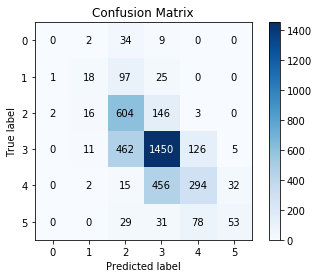

In [43]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

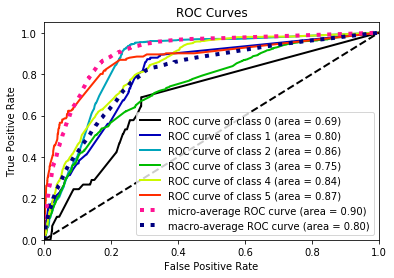

In [44]:
skplt.metrics.plot_roc(y_test, random_forest.predict_proba(X_test))
plt.show()

### Preguntas

* ¿Consideras que los resultados son buenos o malos?
* Qué podemos hacer para mejorarlo?

En principio la tasa de verdaderos positivos es bastante baja, y eso se muestra en la ROC con valores que no superan el 0.90 

El modelo se podria mejorar estudiando una simplificacion de las salidas, al tener menos categorias; asi como una evaluación de las ponderaciones de las entradas con respecto a la influencia en los diferentes niveles de precio.

## Análisis de variables (extra)

Algunos métodos incluyen una variable denominada `feature_importances_` que nos proporciona una estimación de la importancia de esa variable.

Analiza las variables, su importancia y propone maneras para mejorar el dataset.

In [45]:
X_train = pd.DataFrame(X_train) #Se convierte para intrroducirrlo en la funcion feature_importances

In [46]:
import pandas as pd
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [47]:
type(X_train)

pandas.core.frame.DataFrame

In [48]:
feature_importances # Se observa que room type y property type on los menos relevantes. Puede deberse a la
#calsificación aleatoria de property type
#Se podría empezar eliminando estas columnas y añadiendo otras con importancia en el output

,importance
1,0.372884
0,0.235800
4,0.183732
3,0.182470
2,0.025115
